# Final evaluation

In [1]:
# dependencies loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
from scipy.stats import uniform
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier
import sklearn_relief as sr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet
)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    make_scorer
)

import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set_style("whitegrid")

#set Pandas display option 
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 500)

#set figure size
plt.rcParams['figure.figsize'] = (8, 6)

#ensure that code is reproducible by setting random seed
np.random.seed(1916) 

We have to use our 3 models to score our test set

# KNN

In [2]:
#df_train = pd.read_csv("../data/output/after_encoding_train.csv", index_col=0)
#df_test = pd.read_csv("../data/output/after_encoding_test.csv", index_col=0)

df_train = pd.read_csv("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/data/output/after_encoding_train.csv", index_col=0)
df_test = pd.read_csv("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/data/output/after_encoding_test.csv", index_col=0)

In [5]:
#model = pickle.load(open("../models/knn.sav", 'rb'))
model = pickle.load(open("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/models/knn.sav", 'rb'))

In [9]:
X = ["('never',).5", "('Carry out & Take away',)", "('4~8',).5", "('Restaurant(<20)',)", "('1~3',).5", "('Bar',)", "('2h',)", "('1d',)", "('Friend(s)',)", "('No Urgent Place',)", "('never',).1", 'to_Coupon', "('1~3',).1", 'toCoupon_GEQ25min', "('Alone',)", "('Sunny',)", "('Coffee House',)", "('gt8',).5", "('Restaurant(20-50)',)", "('2PM',)"]
y_pred = model.predict(df_test.loc[:,X].values)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [11]:
y_true = df_test.target.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
knn_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [13]:
knn_model_score.rename(index={0: 'knn_model'},inplace=True)

In [14]:
knn_model_score

,RMSE,MAE
knn_model,0.58425,0.341348


# Decision Tree

In [15]:
#df_train = pd.read_csv("../data/output/after_encoding_train.csv", index_col=0)
#df_test = pd.read_csv("../data/output/after_encoding_test.csv", index_col=0)

df_train = pd.read_csv("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/data/output/after_encoding_train.csv", index_col=0)
df_test = pd.read_csv("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/data/output/after_encoding_test.csv", index_col=0)

In [16]:
X = ["('never',).5", "('Kid(s)',)", "('Partner',)", "('gt8',)", "('2h',)", "('Restaurant(<20)',)", "('Legal',)", "('7AM',)", "('Single',)", "('Healthcare Practitioners & Technical',)", "('Sales & Related',)", "('Carry out & Take away',)", "('1~3',).2", "('1d',)", "('2PM',)", "('1~3',).1", "('Bar',)", "('below21',)", "('Installation Maintenance & Repair',)", "('10PM',)", "('1~3',).5", "('10AM',)", "('4~8',).5", "('Food Preparation & Serving Related',)", "('21',)", "('Sunny',)", "('less1',).5", "('Student',)", "('never',).1", "('No Urgent Place',)", "('1~3',)", 'toCoupon_GEQ25min', "('Friend(s)',)", "('Female',)", "('Less than $12500',)"]

In [17]:
model = pickle.load(open("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/models/dt.sav", 'rb'))
#model = pickle.load(open("../models/dt.sav", 'rb'))

y_pred = model.predict(df_test.loc[:,X].values)

y_true = df_test.target.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
dt_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [19]:
dt_model_score.rename(index={0: 'dt_model'},inplace=True)

dt_model_score

,RMSE,MAE
dt_model,0.566437,0.320851


# Random Forest

In [20]:
#df_train = pd.read_csv("../data/output/after_encoding_train.csv", index_col=0)
#df_test = pd.read_csv("../data/output/after_encoding_test.csv", index_col=0)

df_train = pd.read_csv("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/data/output/after_encoding_train.csv", index_col=0)
df_test = pd.read_csv("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/data/output/after_encoding_test.csv", index_col=0)

In [22]:
X = ["('never',).5", "('Kid(s)',)", "('Partner',)", "('gt8',)", "('2h',)", "('Restaurant(<20)',)", "('Legal',)", "('7AM',)", "('Single',)", "('Healthcare Practitioners & Technical',)", "('Sales & Related',)", "('Carry out & Take away',)", "('1~3',).2", "('1d',)", "('2PM',)", "('1~3',).1", "('Bar',)", "('below21',)", "('Installation Maintenance & Repair',)", "('10PM',)", "('1~3',).5", "('10AM',)", "('4~8',).5", "('Food Preparation & Serving Related',)", "('21',)", "('Sunny',)", "('less1',).5", "('Student',)", "('never',).1", "('No Urgent Place',)", "('1~3',)", 'toCoupon_GEQ25min', "('Friend(s)',)", "('Female',)", "('Less than $12500',)", "('Architecture & Engineering',)", "('Computer & Mathematical',)", "('Married partner',)", "('Personal Care & Service',)", "('Protective Service',)", "('Divorced',)", "('Coffee House',)", "('$25000 - $37499',)", "('gt8',).2", "('Business & Financial',)", "('Transportation & Material Moving',)", 'to_Coupon', "('Snowy',)", "('Some college - no degree',)", "('less1',).1"]
model = pickle.load(open("C:/Users/adria/Desktop/in-vehicle-coupon-recommendation/models/rf.sav", 'rb'))
#model = pickle.load(open("../models/rf.sav", 'rb'))
y_pred = model.predict(df_test.loc[:,X].values)

y_true = df_test.target.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
rf_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

rf_model_score.rename(index={0: 'rf_model'},inplace=True)

rf_model_score

,RMSE,MAE
rf_model,0.526027,0.276705


# Final comparison 

In [23]:
final_comparison = pd.concat([knn_model_score, dt_model_score, rf_model_score])

In [24]:
final_comparison.sort_values("RMSE")

,RMSE,MAE
rf_model,0.526027,0.276705
dt_model,0.566437,0.320851
knn_model,0.584250,0.341348


In [25]:
final_comparison.rename({"knn_model":"KNN", "dt_model": "Decision Tree", "rf_model" : "Random Forest"},inplace=True)

In [26]:
final_comparison = final_comparison.round(6)

In [27]:
final_comparison

,RMSE,MAE
KNN,0.584250,0.341348
Decision Tree,0.566437,0.320851
Random Forest,0.526027,0.276705


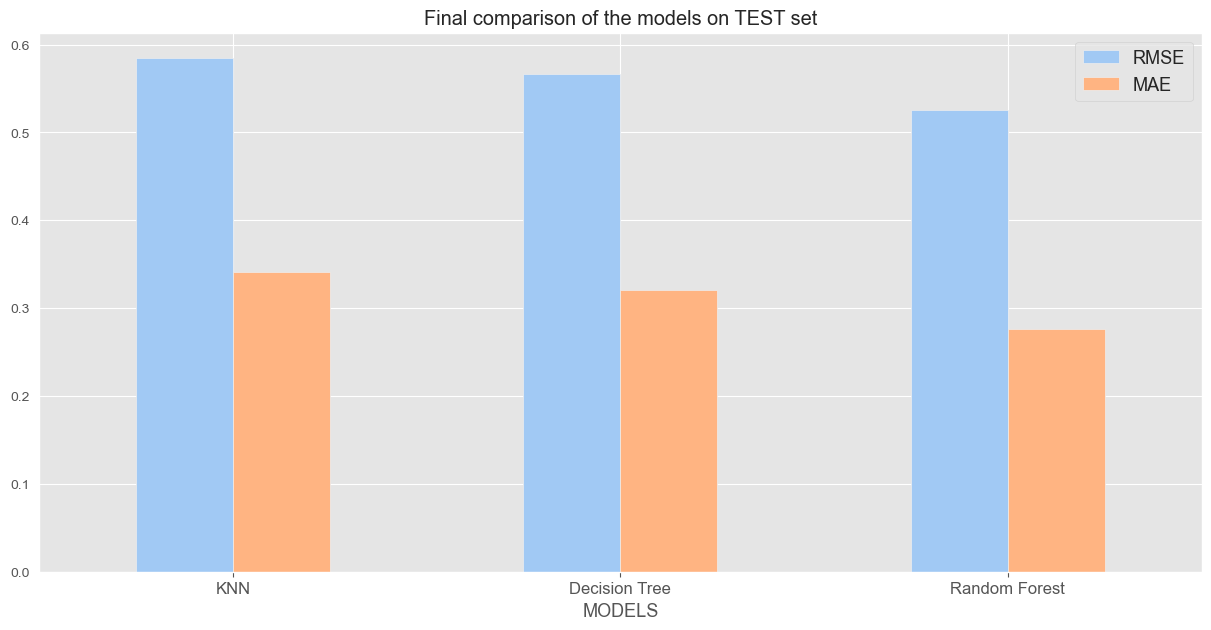

In [31]:
pastel_palette = sns.color_palette("pastel")

plt.style.use('ggplot')
sns.set_palette(pastel_palette)
ax = final_comparison.plot(kind='bar', figsize=(15, 7), title="Final comparison of the models on TEST set")
ax.legend(fontsize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,  # labels along the bottom edge are off
)
ax.set_xticklabels(final_comparison.index, rotation=0, fontsize=12)
ax.set_xlabel("MODELS", fontsize=13)

plt.show()

And the winner is: **Random Forest**, but we see that KNN and Decision Tree were very close.